# Restaurant Sales Forecasting

## Data Analysis

### Load the csv files

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
items = 'https://raw.githubusercontent.com/tksundar/sales_forecasting/refs/heads/master/items.csv'
restaurants = 'https://raw.githubusercontent.com/tksundar/sales_forecasting/refs/heads/master/resturants.csv'
sales = 'https://raw.githubusercontent.com/tksundar/sales_forecasting/refs/heads/master/sales.csv'
items_data = pd.read_csv(items)
restaurants_data = pd.read_csv(restaurants)
sales_data = pd.read_csv(sales)

In [ ]:
len(items_data.id)
items_data.sort_values(by='id').head()

,id,store_id,name,kcal,cost
0,1,4,Chocolate Cake,554,6.71
1,2,4,Breaded Fish with Vegetables Meal,772,15.09
2,3,1,Sweet Fruity Cake,931,29.22
3,4,1,Amazing Steak Dinner with Rolls,763,26.42
4,5,5,Milk Cake,583,6.07


In [ ]:
restaurants_data

,id,name
0,1,Bob's Diner
1,2,Beachfront Bar
2,3,Sweet Shack
3,4,Fou Cher
4,5,Corner Cafe
5,6,Surfs Up


In [ ]:
sales_data.head(5)

,date,item_id,price,item_count
0,2019-01-01,3,29.22,2.0
1,2019-01-01,4,26.42,22.0
2,2019-01-01,12,4.87,7.0
3,2019-01-01,13,4.18,12.0
4,2019-01-01,16,3.21,136.0


The `cost` in items data and` price` in sales data are the same

In [ ]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109600 entries, 0 to 109599
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   date        109600 non-null  object 
 1   item_id     109600 non-null  int64  
 2   price       109600 non-null  float64
 3   item_count  109600 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.3+ MB


In [ ]:
sales_data.isna().sum()

,0
date,0
item_id,0
price,0
item_count,0


In [ ]:

sales_data.describe()

,item_id,price,item_count
count,109600.000000,109600.000000,109600.000000
mean,50.500000,11.763700,6.339297
std,28.866202,8.946225,30.003728
min,1.000000,1.390000,0.000000
25%,25.750000,5.280000,0.000000
50%,50.500000,7.625000,0.000000
75%,75.250000,18.790000,0.000000
max,100.000000,53.980000,570.000000


THis is a peculiar scenario. Thare are no missing values per se. But a majority of values for the item_count column is zero. This as good as a missing value. But we can nt drop this column because dropping this column will prevent any further analysis( we can not find sales per item based on which we can make predictions). So the best option is to replace the zero with mean.

In [ ]:
mean = round(np.mean(sales_data['item_count']))
sales_data['item_count'] = sales_data['item_count'].replace(0, mean)
sales_data.describe()

,item_id,price,item_count
count,109600.000000,109600.000000,109600.000000
mean,50.500000,11.763700,11.053677
std,28.866202,8.946225,29.094886
min,1.000000,1.390000,1.000000
25%,25.750000,5.280000,6.000000
50%,50.500000,7.625000,6.000000
75%,75.250000,18.790000,6.000000
max,100.000000,53.980000,570.000000


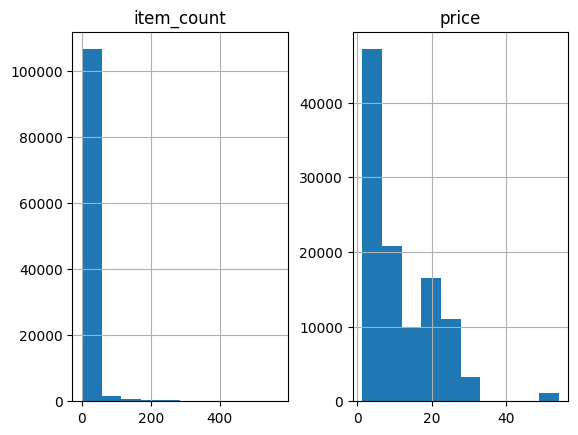

In [ ]:
_=sales_data[['item_count','price']].hist()

### Merge all dataframes to one

In [ ]:

id_name_dict = dict(zip(items_data.id, items_data.name))
id_storeid_dict = dict(zip(items_data.id, items_data.store_id))
rest_id_name_dict = dict(zip(restaurants_data.id, restaurants_data.name))
item_id_kcal_dict = dict(zip(items_data.id, items_data.kcal))
sales_data['item_calories'] = sales_data['item_id'].map(item_id_kcal_dict)
sales_data['item_name'] = sales_data['item_id'].map(id_name_dict)
sales_data['store_id'] = sales_data['item_id'].map(id_storeid_dict)
sales_data['rest_name'] = sales_data['store_id'].map(rest_id_name_dict)
sales_data['date'] = pd.to_datetime(sales_data['date'])
sales_data['day_of_the_week'] = sales_data.date.dt.day_of_week
print(sales_data.shape)
sales_data.sample(5)

(109600, 9)


,date,item_id,price,item_count,item_calories,item_name,store_id,rest_name,day_of_the_week
4458,2019-02-14,52,5.68,6.0,535,Original Sweet Milky Soft Drink,3,Sweet Shack,3
13983,2019-05-20,84,19.77,6.0,855,BBQ Pork Steak,5,Corner Cafe,0
77493,2021-02-13,94,5.71,6.0,331,Fruity Milky Smoothy,6,Surfs Up,5
22115,2019-08-10,68,8.70,1.0,652,Blue Ribbon Fruity Milky Cake,1,Bob's Diner,5
76693,2021-02-05,94,5.71,6.0,331,Fruity Milky Smoothy,6,Surfs Up,4


In [ ]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109600 entries, 0 to 109599
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   date             109600 non-null  datetime64[ns]
 1   item_id          109600 non-null  int64         
 2   price            109600 non-null  float64       
 3   item_count       109600 non-null  float64       
 4   item_calories    109600 non-null  int64         
 5   item_name        109600 non-null  object        
 6   store_id         109600 non-null  int64         
 7   rest_name        109600 non-null  object        
 8   day_of_the_week  109600 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(3), object(2)
memory usage: 7.1+ MB


### Add a column for total sale amount

In [ ]:

sales_data['sale_amount'] = sales_data['item_count'] * sales_data['price']
sales_data.head(5)

,date,item_id,price,item_count,item_calories,item_name,store_id,rest_name,day_of_the_week,sale_amount
0,2019-01-01,3,29.22,2.0,931,Sweet Fruity Cake,1,Bob's Diner,1,58.44
1,2019-01-01,4,26.42,22.0,763,Amazing Steak Dinner with Rolls,1,Bob's Diner,1,581.24
2,2019-01-01,12,4.87,7.0,478,Fantastic Sweet Cola,1,Bob's Diner,1,34.09
3,2019-01-01,13,4.18,12.0,490,Sweet Frozen Soft Drink,1,Bob's Diner,1,50.16
4,2019-01-01,16,3.21,136.0,284,Frozen Milky Smoothy,1,Bob's Diner,1,436.56


        date  sale_amount
0 2019-12-31   3854481.45
1 2020-12-31   4109139.62
2 2021-12-31   4331492.00


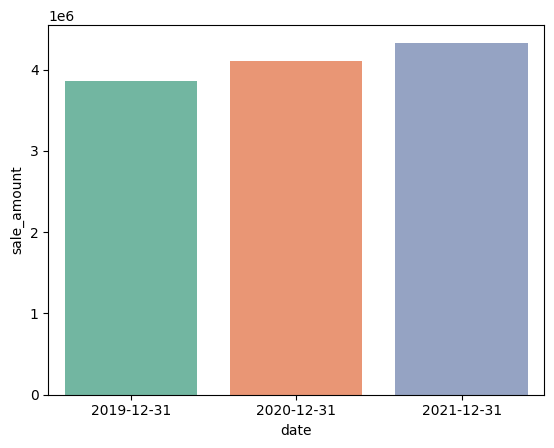

In [ ]:
import warnings
warnings.filterwarnings('ignore')

yearly_sales_data = pd.DataFrame(sales_data.groupby(pd.Grouper(key='date', axis=0, freq='YE')).sale_amount.sum()).reset_index()
print(yearly_sales_data)
_=sns.barplot(data=yearly_sales_data, x='date', y='sale_amount', palette = sns.mpl_palette('Set2'))

### Quarterly sales data for 3 years

         date  sale_amount
0  2019-03-31    868277.48
1  2019-06-30   1059445.94
2  2019-09-30   1050594.53
3  2019-12-31    876163.50
4  2020-03-31    912813.58
5  2020-06-30   1122807.33
6  2020-09-30   1131167.76
7  2020-12-31    942350.95
8  2021-03-31    959148.15
9  2021-06-30   1203849.99
10 2021-09-30   1198713.82
11 2021-12-31    969780.04


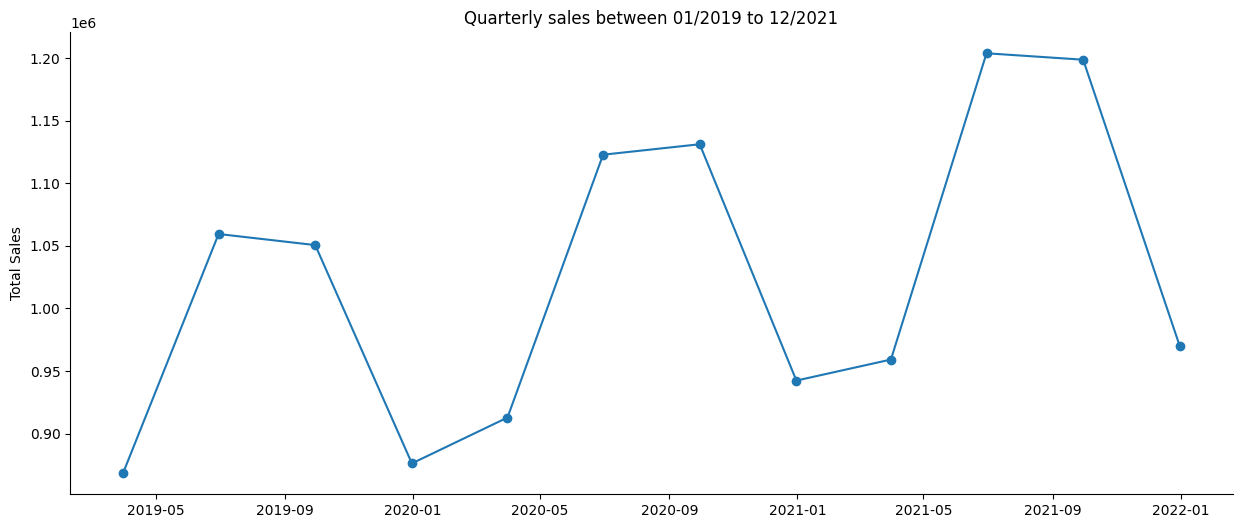

In [ ]:
quarterly_sales_19_21 = pd.DataFrame(sales_data.groupby(pd.Grouper(key='date', axis=0, freq='QE')).sale_amount.sum()).reset_index()
plt.figure(figsize=(15,6))
print(quarterly_sales_19_21)
_=plt.plot(quarterly_sales_19_21['date'], quarterly_sales_19_21['sale_amount'], marker='o', linestyle='-')
plt.ylabel('Total Sales')
plt.title("Quarterly sales between 01/2019 to 12/2021" )
plt.gca().spines[['top', 'right',]].set_visible(False )




### Monthly Sales for 3 years

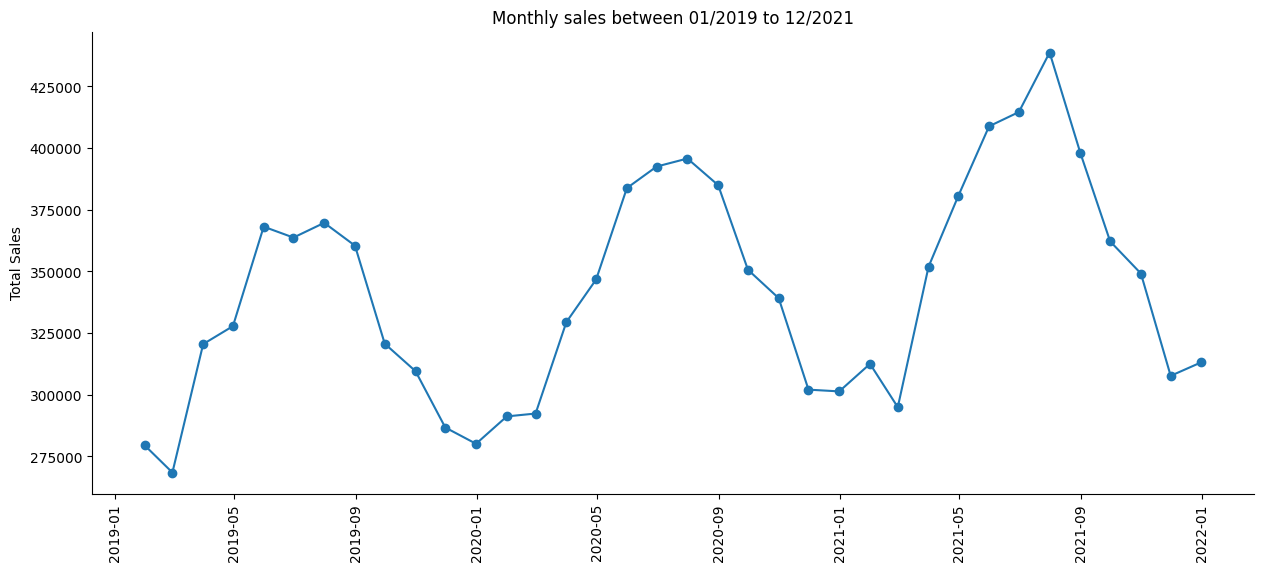

In [ ]:
monthly_sales_19_21 = pd.DataFrame(sales_data.groupby(pd.Grouper(key='date', axis=0, freq='ME')).sale_amount.sum()).reset_index()
plt.figure(figsize=(15,6))
plt.plot(monthly_sales_19_21['date'], monthly_sales_19_21['sale_amount'], marker='o', linestyle='-')
plt.ylabel('Total Sales')
plt.xticks(rotation = 90)
plt.title("Monthly sales between 01/2019 to 12/2021" )
plt.gca().spines[['top', 'right',]].set_visible(False )


### Weekly Sales for 3 years

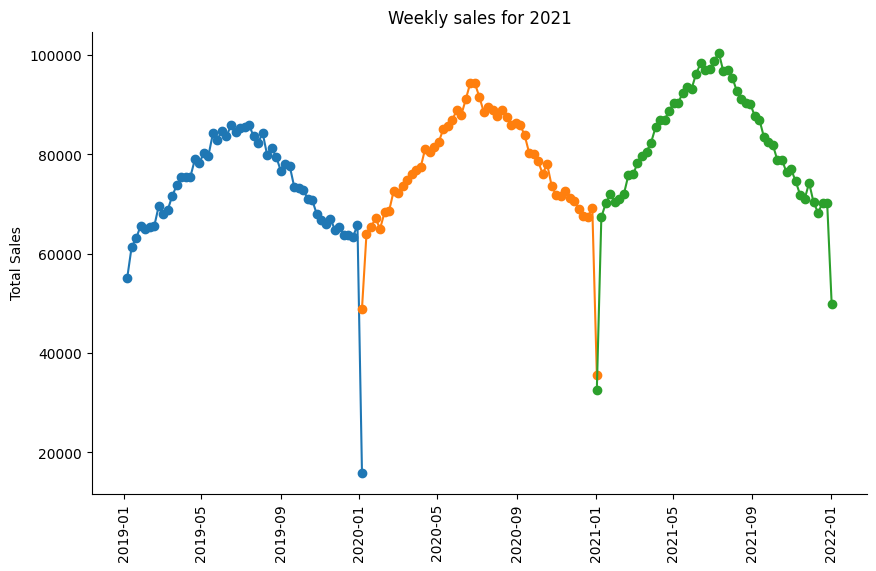

In [ ]:
weekly_sales_19_21 = pd.DataFrame(sales_data.groupby(pd.Grouper(key='date', axis=0, freq='W')).sale_amount.sum()).reset_index()

years = [2019,2020,2021]
plt.figure(figsize=(10,6))
for i,year in enumerate(years):
  sales = sales_data[sales_data['date'].dt.year == year]
  weekly_sales = pd.DataFrame(sales.groupby(pd.Grouper(key='date', axis=0, freq='W')).sale_amount.sum()).reset_index()
  plt.plot(weekly_sales['date'], weekly_sales['sale_amount'], marker='o', linestyle='-')
  plt.ylabel('Total Sales')
  plt.xticks(rotation=90)
  plt.title(f"Weekly sales for {year}" )
  plt.gca().spines[['top', 'right',]].set_visible(False )




### Total Sales by week day

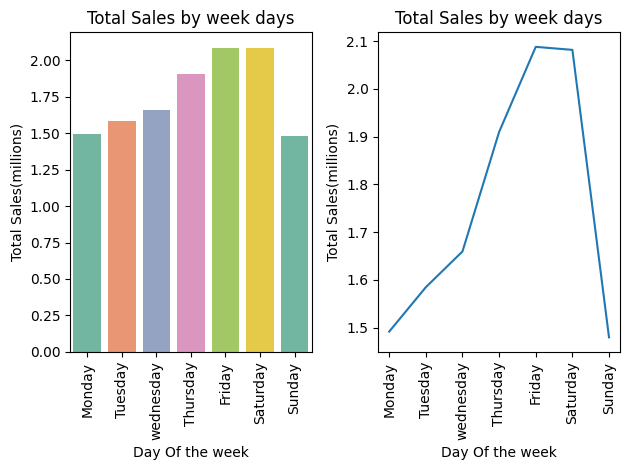

,day_of_the_week,sale_amount
0,Monday,1.491830
1,Tuesday,1.584728
2,wednesday,1.659573
3,Thursday,1.909694
4,Friday,2.087893
5,Saturday,2.081594
6,Sunday,1.479801


In [ ]:

week_days = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}
million = 1000000
df = pd.DataFrame(sales_data.groupby('day_of_the_week')['sale_amount'].sum()/million).reset_index()
df['day_of_the_week'] = df.day_of_the_week.map(week_days)
plt.subplot(1,2,1)
sns.barplot(data = df , x='day_of_the_week', y='sale_amount', palette=sns.mpl_palette('Set2'))
plt.xticks(rotation = 90)
plt.xlabel('Day Of the week')
plt.ylabel('Total Sales(millions)')
plt.title('Total Sales by week days')
plt.subplot(1,2,2)
sns.lineplot(data=df, x='day_of_the_week', y='sale_amount')
plt.xlabel('Day Of the week')
plt.ylabel('Total Sales(millions)')
plt.title('Total Sales by week days')
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()
df

### Sales Revenue vs Sales Volume

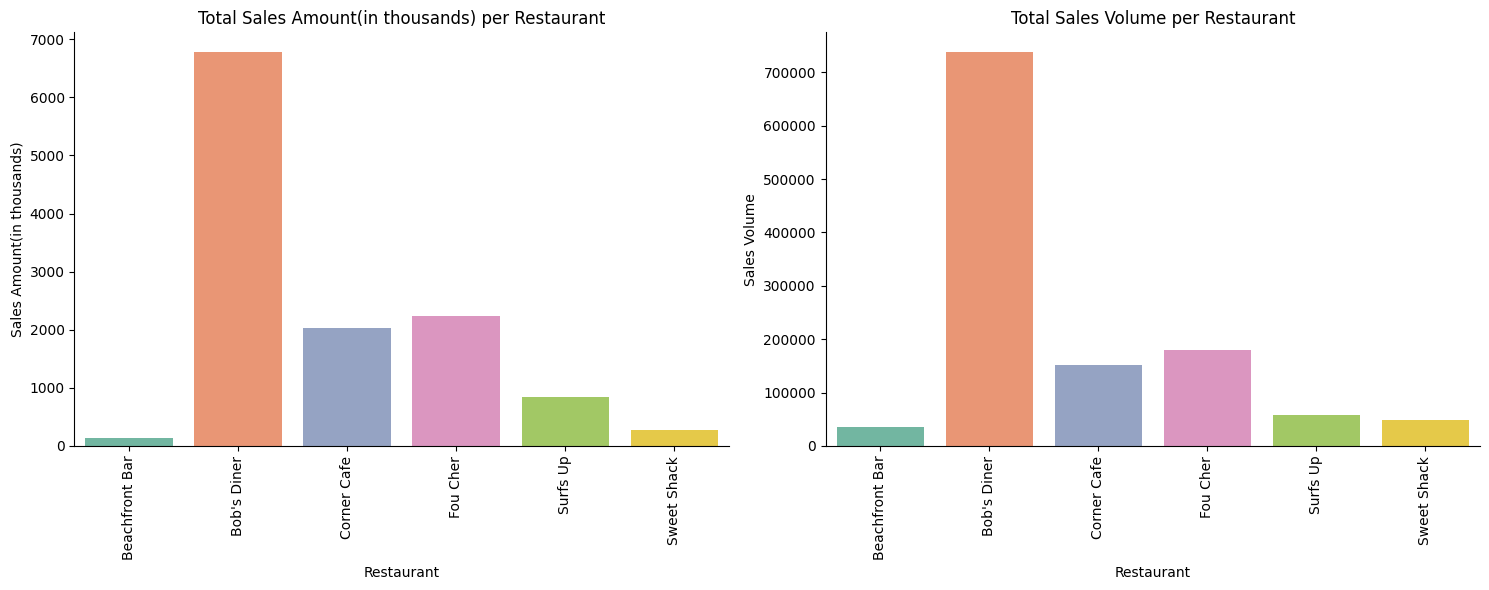

,rest_name,sale_amount
0,Beachfront Bar,129.35394
1,Bob's Diner,6780.94365
2,Corner Cafe,2031.71563
3,Fou Cher,2232.64087
4,Surfs Up,849.02197
5,Sweet Shack,271.43701


In [ ]:
import warnings
warnings.filterwarnings('ignore')
sales_by_restaurant = pd.DataFrame(sales_data.groupby('rest_name').sale_amount.sum()/1000).reset_index()
volume_by_restaurant = pd.DataFrame(sales_data.groupby('rest_name').item_count.sum()).reset_index()
plt.figure(figsize=(15,6))
sales = [sales_by_restaurant,volume_by_restaurant]
cols = ['sale_amount','item_count']
col_map = {cols[0]: 'Sales Amount(in thousands)',cols[1]:"Sales Volume"}
for i,item in enumerate(sales):
  plt.subplot(1,2,i+1)
  sns.barplot(x='rest_name', y=cols[i], data=item, palette = sns.color_palette('Set2'))
  plt.xlabel('Restaurant')
  plt.xticks(rotation=90)
  plt.ylabel(f'{col_map[cols[i]]}')
  plt.title(f'Total {col_map[cols[i]]} per Restaurant')
  plt.gca().spines[['top', 'right',]].set_visible(False)
plt.tight_layout()
plt.show()
sales_by_restaurant

We will be tempted to leave out Bobs diner as an outlier. I feel this is wrong. Just because Bob's diner has roughly three times the revenue of the next rstaurant doesnt mean it is an outlier. If for arguments sake we drop Bob's diner, then Fou Cher has almost 20 times revenue as Beachfront bar. So we should drop Beachfront bar too as an outlier. This is illogical. Such cases exist in real life too.In any case it will not skew out data analysis or forecasting as we will see.

The restaurant with higher revenue also has higher volume

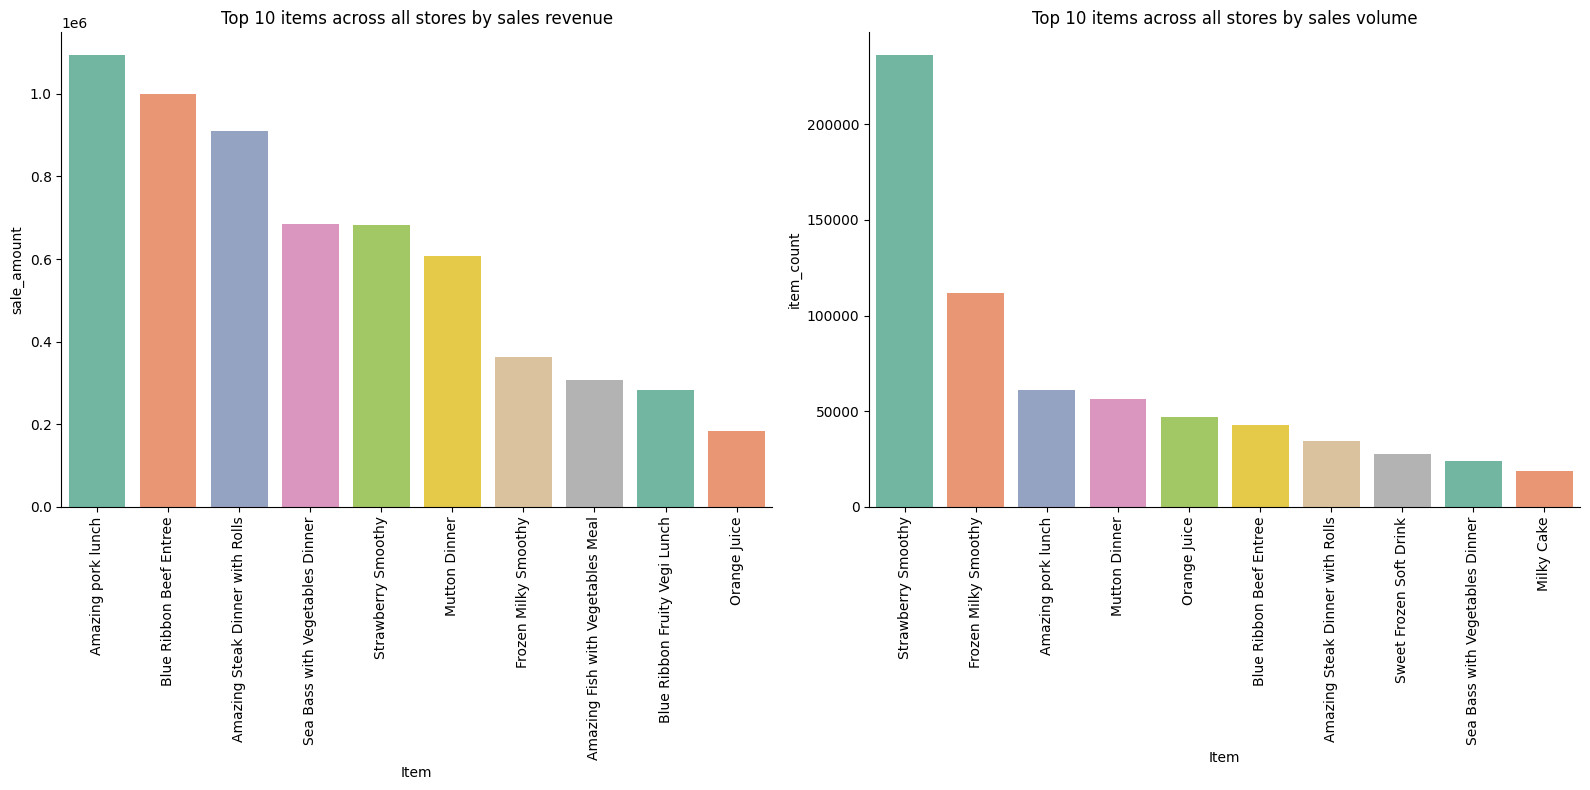

In [ ]:
# most popular items
top_10_by_sales = pd.DataFrame(sales_data.groupby('item_name').sale_amount.sum()).reset_index().sort_values(by='sale_amount',ascending=False).head(10)
top_10_by_item_count = pd.DataFrame(sales_data.groupby('item_name').item_count.sum()).reset_index().sort_values(by='item_count',ascending=False).head(10)
top_10 = [top_10_by_sales,top_10_by_item_count]
cols = ['sale_amount','item_count']
title = {cols[0]: 'sales revenue',cols[1]:'sales volume'}
plt.figure(figsize=(16,8))
for i,item in enumerate(top_10):
  plt.subplot(1,2,i+1)
  sns.barplot(x='item_name', y=cols[i], data=item, palette = sns.color_palette('Set2'))
  plt.ylabel(f'{cols[i]}')
  plt.xticks(rotation=90)
  plt.xlabel('Item')
  plt.title(f'Total {cols[i]} per Item')
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.title(f'Top 10 items across all stores by {title[cols[i]]}')
plt.tight_layout()
plt.show()

Most of the items figure in both lists

### Top 10 items sold by restaurant

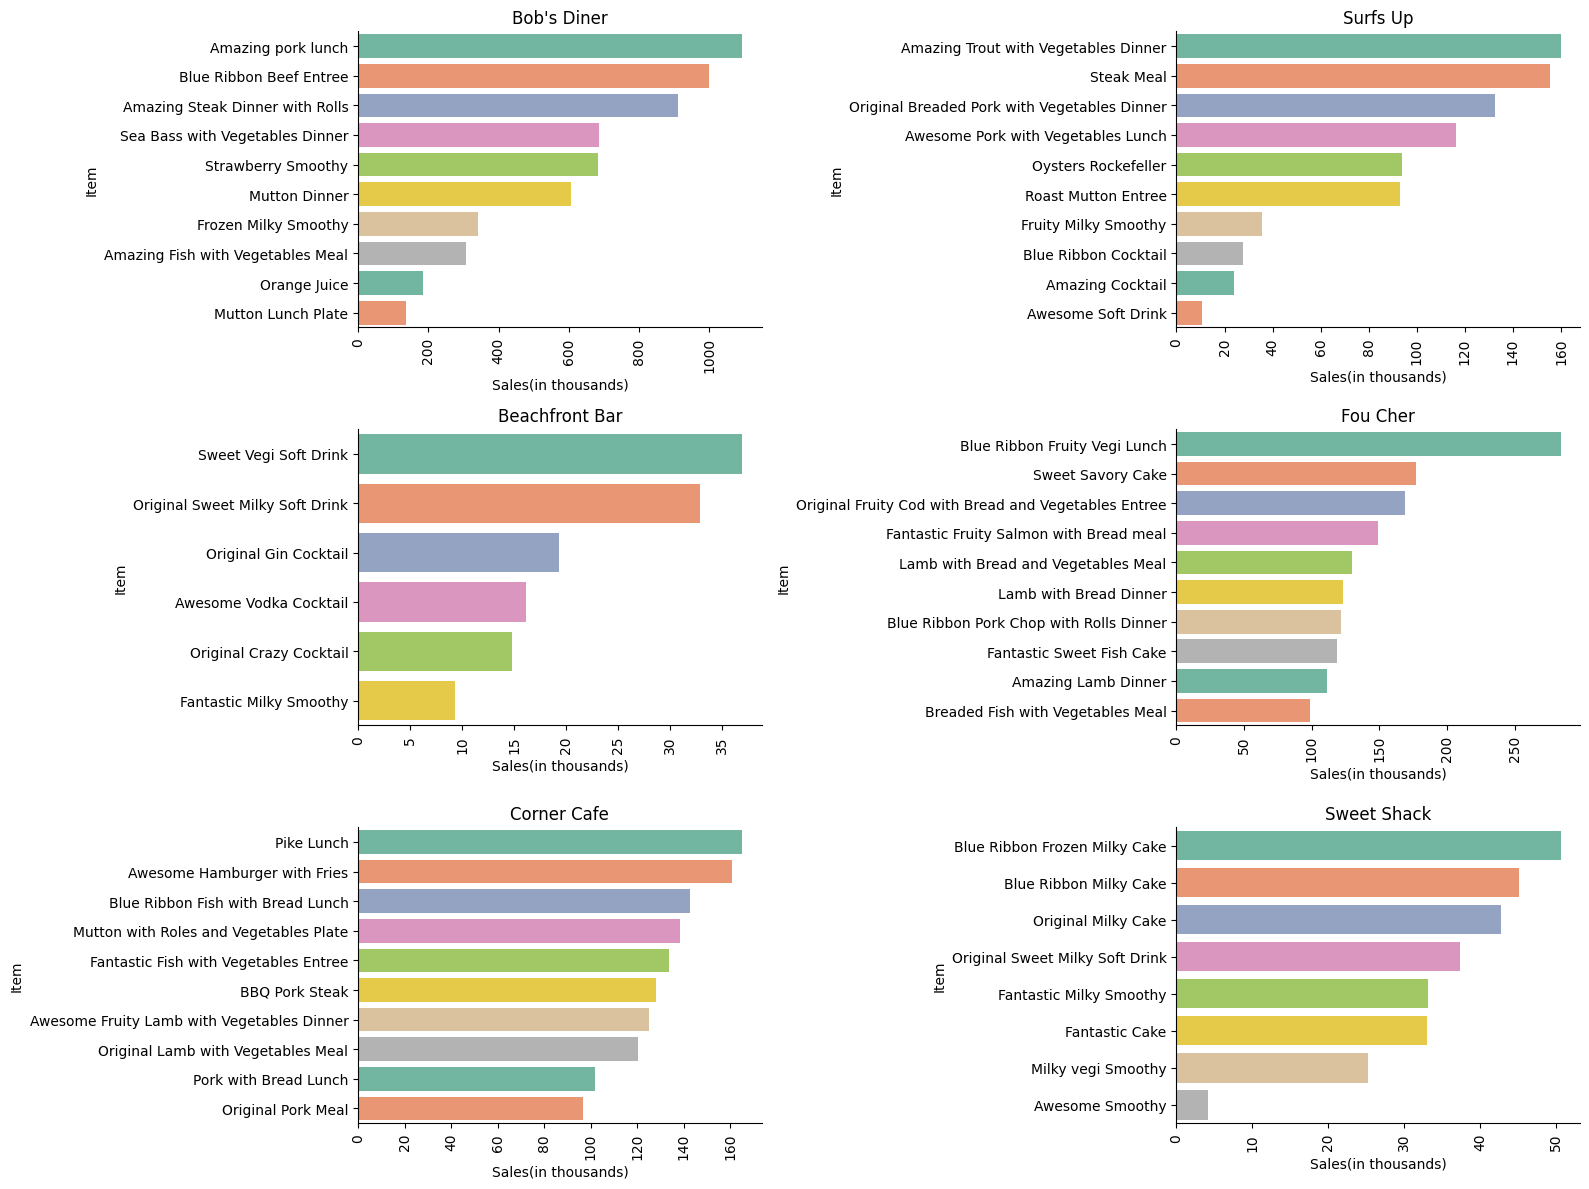

In [ ]:
stores = sales_data['rest_name'].unique()
plt.figure(figsize=(16,12))
for i,store in enumerate(stores):
  plt.subplot(3,2,i+1)
  store_data = sales_data[sales_data['rest_name'] == store]
  store_sales_by_item = pd.DataFrame(store_data.groupby('item_name').sale_amount.sum()/1000).reset_index().sort_values(by='sale_amount', ascending=False).head(10)
  ax = sns.barplot(y='item_name', x='sale_amount', data=store_sales_by_item, palette = sns.color_palette('Set2'))
  plt.title(store)
  plt.xticks(rotation=90)
  plt.xlabel('Sales(in thousands)')
  plt.ylabel('Item')

  plt.gca().spines[['top', 'right',]].set_visible(False)
plt.tight_layout()

plt.show()

### Highest calorie item sold by each restaurant

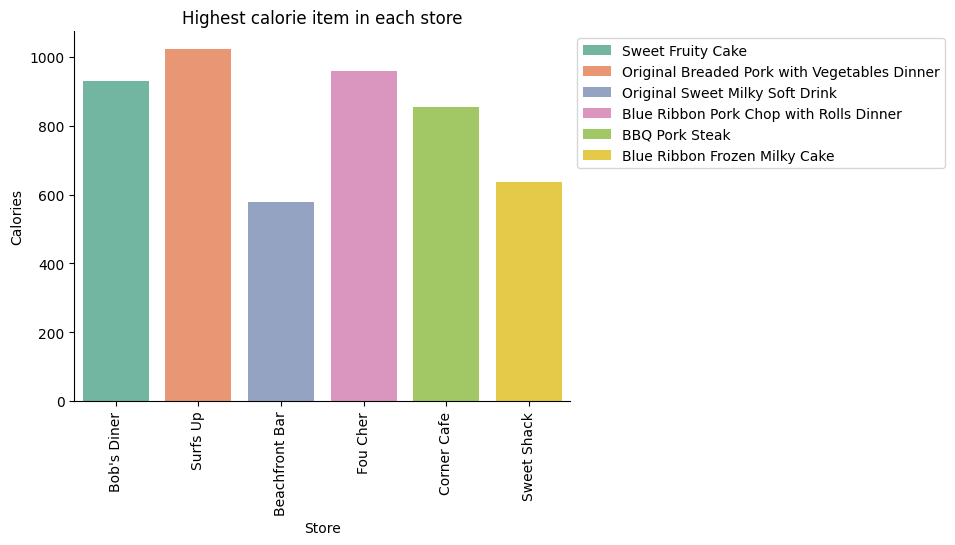

In [ ]:
#Most expensive item per restaurant with caolorie count
stores = sales_data.rest_name.unique()
items = []
calories = []
for store in stores:
    store_data = sales_data[sales_data.rest_name == store].sort_values(by='item_calories', ascending=False).head(1)
    max_cals = store_data.item_calories.max()
    max_cal_item = store_data.item_name.values[0]
    items.append(max_cal_item)
    calories.append(max_cals)

d = {
    'Store' : stores,
    'Item' : items,
    'Calories' : calories
}
df = pd.DataFrame(d)
sns.barplot(data=df, x='Store', y='Calories',hue='Item',palette = sns.color_palette('Set2'))
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.xticks(rotation=90)
plt.title('Highest calorie item in each store')
plt.show()




In [ ]:
sales_data.groupby('day_of_the_week')['sale_amount'].mean()

,sale_amount
day_of_the_week,
0,95.630143
1,100.938060
2,105.705318
3,121.636540
4,132.986839
5,133.435497
6,94.859038


## Forecasting

The problem statement doesnt specify a target feature for prediction. I have added a` sale_amount ` column to capture the sales for each item. I will use this column as the target. That is , the model will predict the sales of top 5 menu items for each resturant in the last 6 months. Model performance will be evaluated based on the root mean square error metric

In [ ]:
stores = sales_data.rest_name.unique()
print(stores)


["Bob's Diner" 'Surfs Up' 'Beachfront Bar' 'Fou Cher' 'Corner Cafe'
 'Sweet Shack']


### Gridsearch function

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import root_mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

param_grid_rf =  {
    'n_estimators': [50, 100, 200],
    'max_depth': [2, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5],
    'max_features': ['sqrt', 0.5]
}

param_grid_lr = {
    'n_jobs' : [-1]
}

params_grid = {'RF': param_grid_rf, 'XG' : param_grid_xgb,'LR': param_grid_lr }

models = {'LR' : LinearRegression(n_jobs= -1),'RF':RandomForestRegressor(n_jobs = -1,random_state=42),'XG' : XGBRegressor(n_jobs=-1,random_state=42)}

estimators = {}

BOLD_START = '\033[1m'
END = '\033[0m'
UNDERLINE = '\033[4m'
DARKCYAN = '\033[36m'

def grid_search_cv(model_key,X_train,y_train,X_test,y_test):
  print(f'\n{DARKCYAN}Hyperparameter tuning for {type(models[model_key]).__name__} starting...{END}\n')
  grid_search = GridSearchCV(estimator=models[model_key],
                           param_grid=params_grid[model_key],
                           scoring='neg_root_mean_squared_error',
                           cv=3,
                           verbose=1,
                           n_jobs=-1)

  # Fit GridSearchCV to the training data
  grid_search.fit(X_train, y_train)

  # Get the best parameters and the best score
  best_params = grid_search.best_params_
  best_score = grid_search.best_score_

  print(f"Best parameters: {best_params}")
  print(f"Best negative MSE: {best_score}")

  # Use the best model for predictions
  best_model = grid_search.best_estimator_
  y_pred_tuned_test = best_model.predict(X_test)
  y_pred_tuned_train = best_model.predict(X_train)
  estimators[model_key] = best_model

  # # rsme for testing
  rmse_tuned_test = root_mean_squared_error(y_test, y_pred_tuned_test)
  # rsme for training
  rmse_tuned_train = root_mean_squared_error(y_train, y_pred_tuned_train)

  print(f'Train Root Mean Squared Error for model {type(models[model_key]).__name__}: {rmse_tuned_train:.4f}')
  print(f'Test Root Mean Squared Error for model {type(models[model_key]).__name__}: {rmse_tuned_test:.4f}')
  return rmse_tuned_test


### Create train, validation and test data

In [ ]:


# extract rows up to the end of June 2021
train_data = sales_data[sales_data['date'] <= '2021-06-30' ]
test_data = sales_data[sales_data['date'] > '2021-06-30']
print(f'train data {train_data.shape[0]} rows, test data {test_data.shape[0]} rows')

# drop the categorical columns and the date column
train_data.drop(['date','item_name','rest_name'],inplace = True,axis=1)
test_data.drop(['date','item_name','rest_name'],inplace = True,axis=1)

X = train_data.drop('sale_amount',axis=1)
y = train_data['sale_amount']

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=42)
scaler = MinMaxScaler()
scaler.fit_transform(X_train)
_=scaler.transform(X_test)

# define a filename for saving the model
filename = 'random_forest_model.joblib'


train data 91200 rows, test data 18400 rows


### Evaluate models with hyperparameter tuning




In [ ]:
# Performing grid serach for XGBoost and RandomForest regressors
import joblib
rmses = {}
rmses['LR'] = grid_search_cv('LR',X_train, y_train,X_test,y_test)
rmses['XG'] = grid_search_cv('XG',X_train,y_train,X_test,y_test)
rmses['RF'] = grid_search_cv('RF',X_train,y_train,X_test,y_test)

best_model_key = 'XG' if rmses['XG'] <=  rmses['RF'] else 'RF'

best_model = estimators[best_model_key]
print(f'Best model is {type(best_model).__name__}')
# save the model
joblib.dump(best_model, filename)
print(f"{type(best_model).__name__} model saved to {filename} using joblib")


Hyperparameter tuning for LinearRegression starting...

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best parameters: {'n_jobs': -1}
Best negative MSE: -130.5126438165997
Train Root Mean Squared Error for model LinearRegression: 130.4880
Test Root Mean Squared Error for model LinearRegression: 128.6056

Hyperparameter tuning for XGBRegressor starting...

Fitting 3 folds for each of 243 candidates, totalling 729 fits
Best parameters: {'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.7}
Best negative MSE: -13.968043304746061
Train Root Mean Squared Error for model XGBRegressor: 13.0841
Test Root Mean Squared Error for model XGBRegressor: 13.9018

Hyperparameter tuning for RandomForestRegressor starting...

Fitting 3 folds for each of 162 candidates, totalling 486 fits
Best parameters: {'max_depth': 10, 'max_features': 0.5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best negative MSE: -6.542046572008

#### Load the  model file. This is useful if we have a saved model and we do not want execute gridsearch on session restart

In [ ]:
import joblib
import os

if os.path.exists(filename):
  best_model = joblib.load(filename)



### Using the best model to predict on test_data for last 6 months

In [ ]:

X_test_data = test_data.drop('sale_amount',axis = 1)
y_test_data = test_data['sale_amount']

scaler.transform(X_test_data)
y_pred_test_data = best_model.predict(X_test_data)
rsme = root_mean_squared_error(y_test_data,y_pred_test_data)
print(f'root mean squared error is {rsme:.4f}')


root mean squared error is 8.0566


### Plots of precited and actual values for top 5 items for each store

In [ ]:
X_test_data['Sale Amount Actual'] = y_test_data
X_test_data['Sale Amount Predicted'] = y_pred_test_data
X_test_data.head()

,item_id,price,item_count,item_calories,store_id,day_of_the_week,Sale Amount Actual,Sale Amount Predicted
91200,4,26.42,53.0,763,1,3,1400.26,1384.103274
91201,9,3.91,136.0,135,1,3,531.76,516.622294
91202,11,19.48,1.0,787,4,3,19.48,20.892953
91203,12,4.87,6.0,478,1,3,29.22,32.200253
91204,13,4.18,63.0,490,1,3,263.34,244.196727


In [ ]:
store_ids = X_test_data['store_id'].unique().tolist()
top_5_items = {}
for store_id in store_ids:
   data = X_test_data[X_test_data['store_id'] == store_id]
   data_item = pd.DataFrame(data.groupby(['item_id'])['Sale Amount Actual'].sum()).reset_index().sort_values(by='Sale Amount Actual',ascending=False).head(5)
   top_5 = data_item['item_id'].to_list()
   top_5_items[store_id] = top_5
print(top_5_items)

{1: [38, 76, 59, 4, 19], 4: [80, 34, 97, 40, 65], 6: [8, 27, 33, 61, 88], 2: [62, 98, 78, 100, 29], 3: [77, 46, 86, 52, 81], 5: [50, 69, 96, 10, 36]}


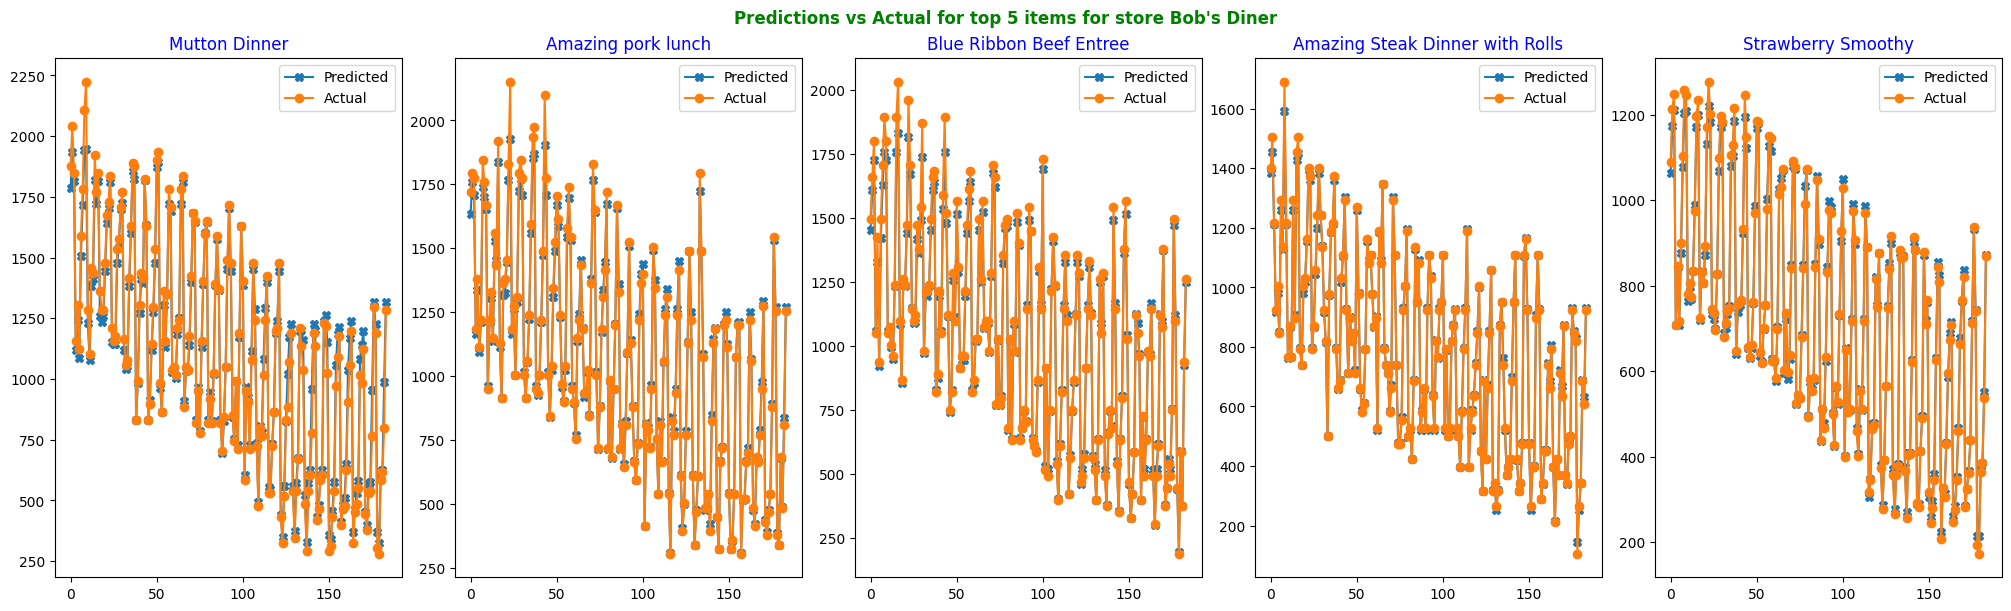

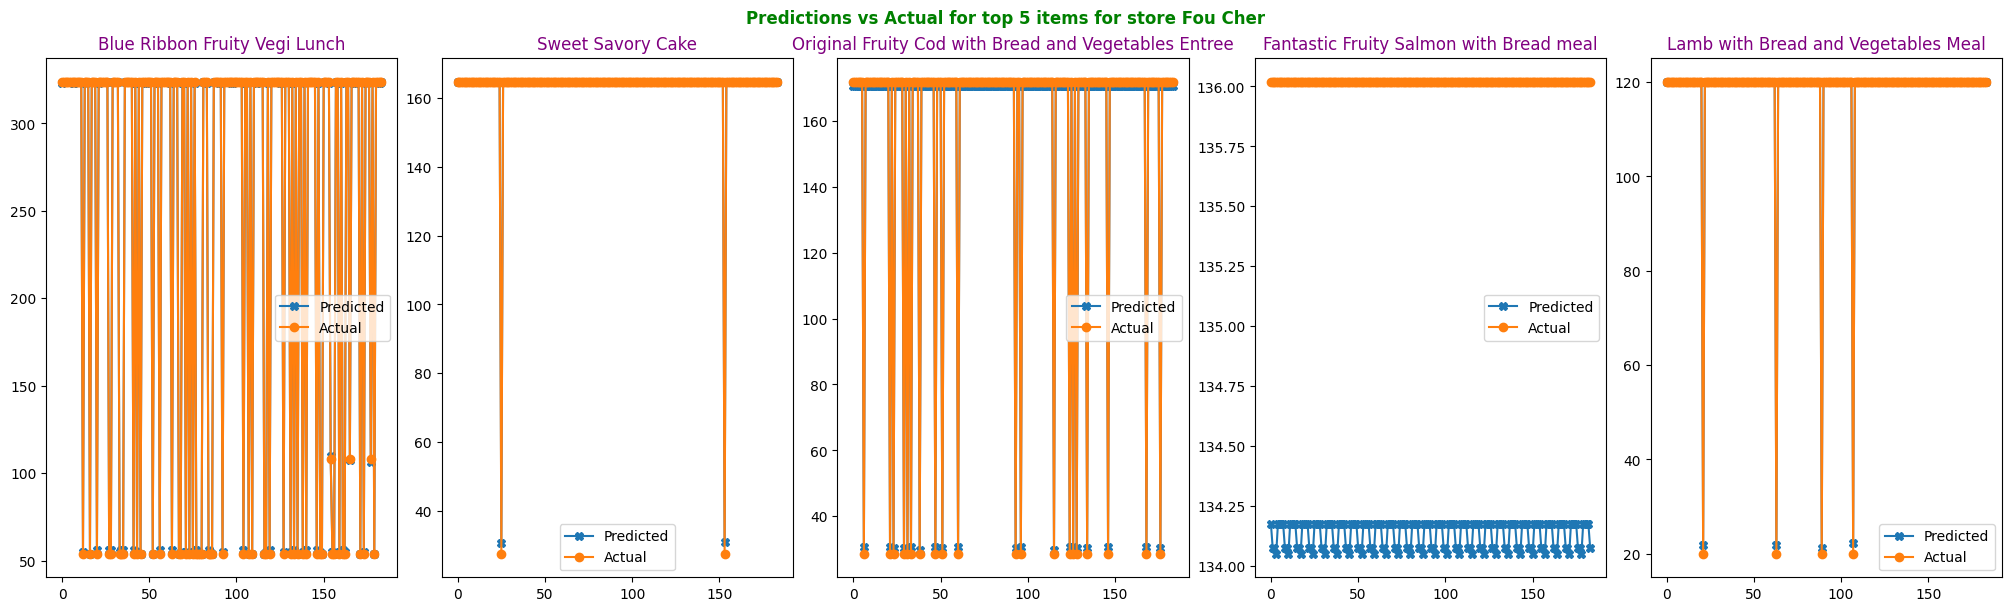

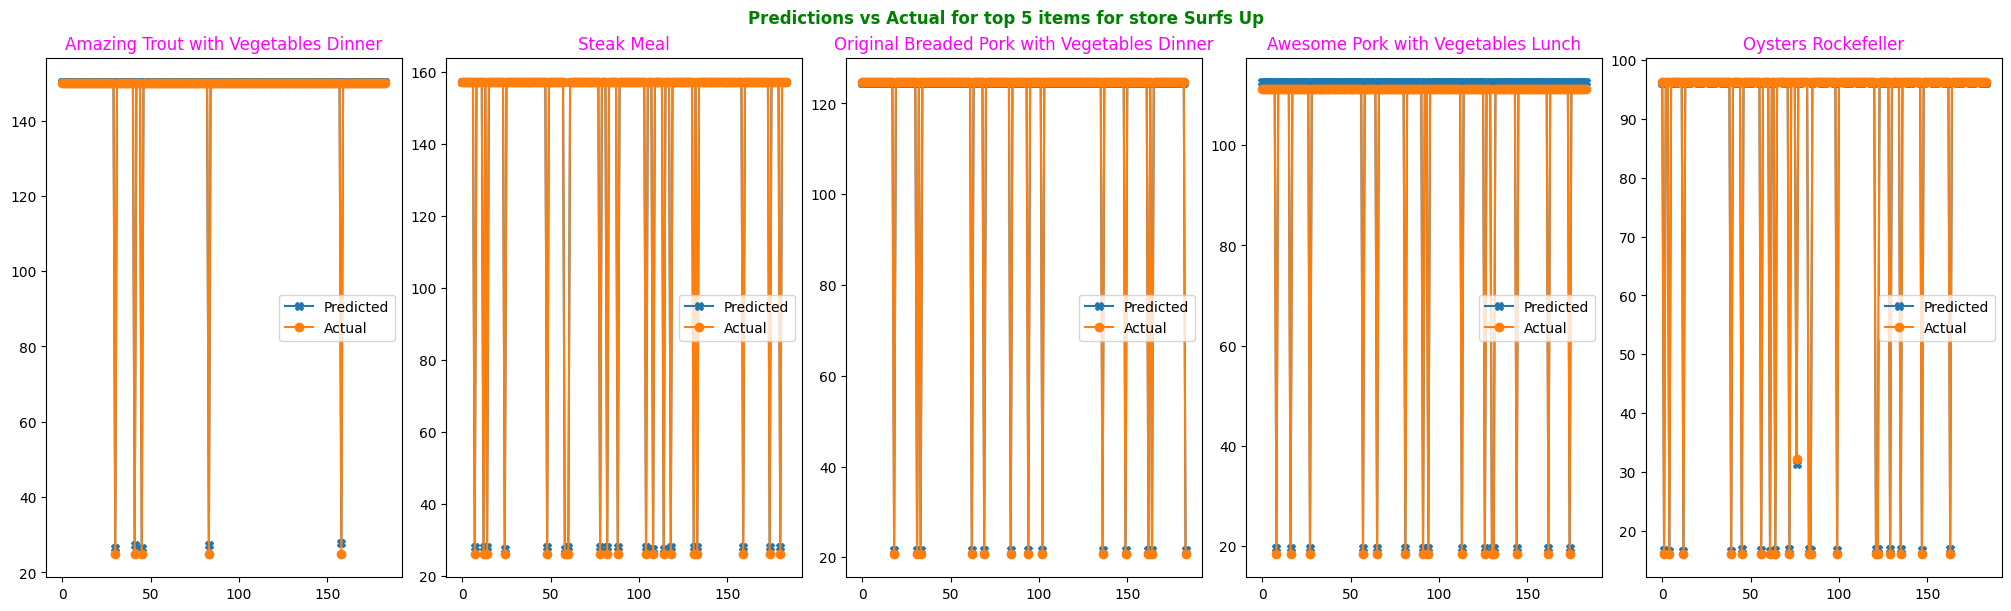

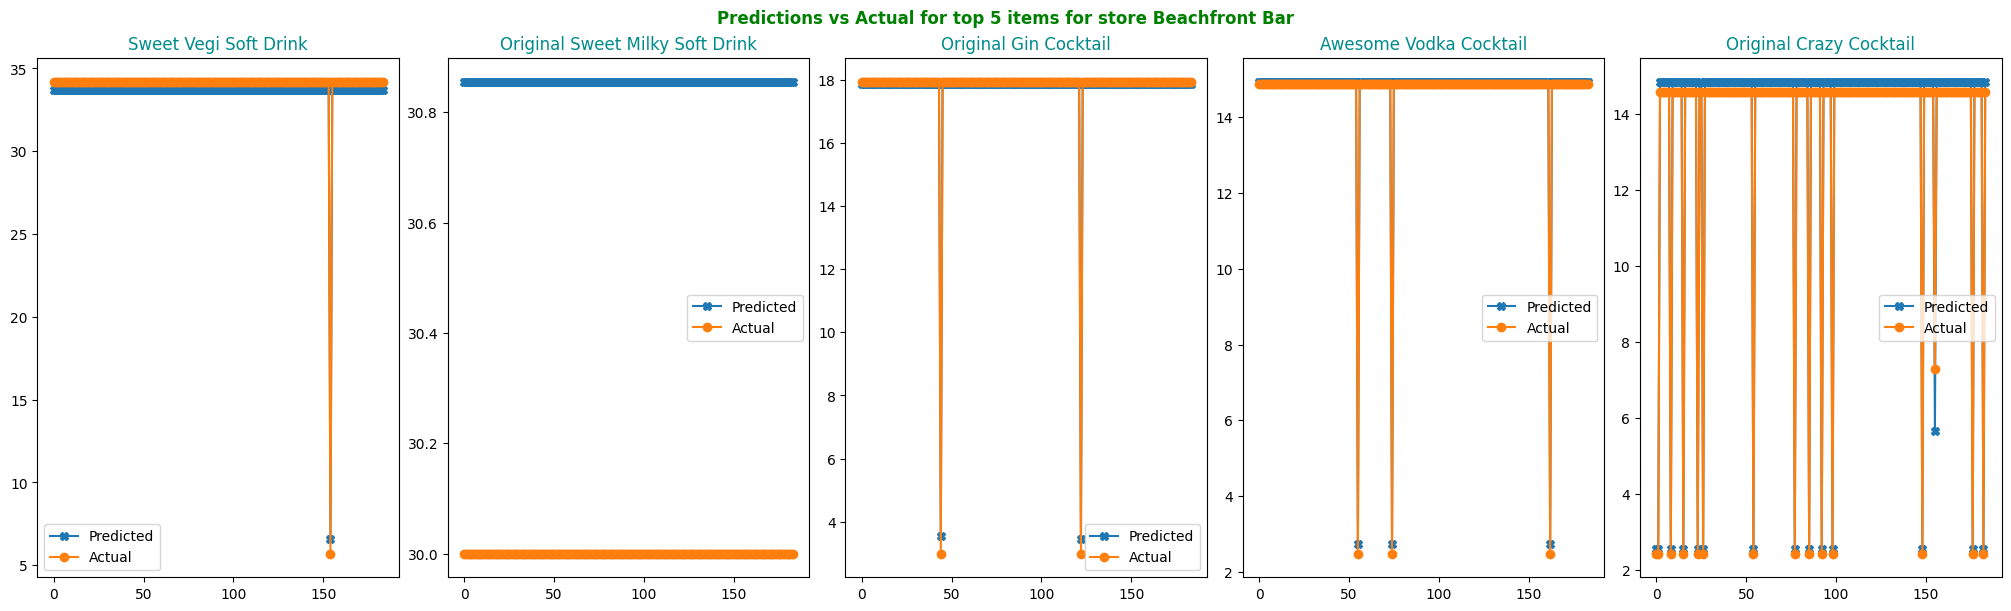

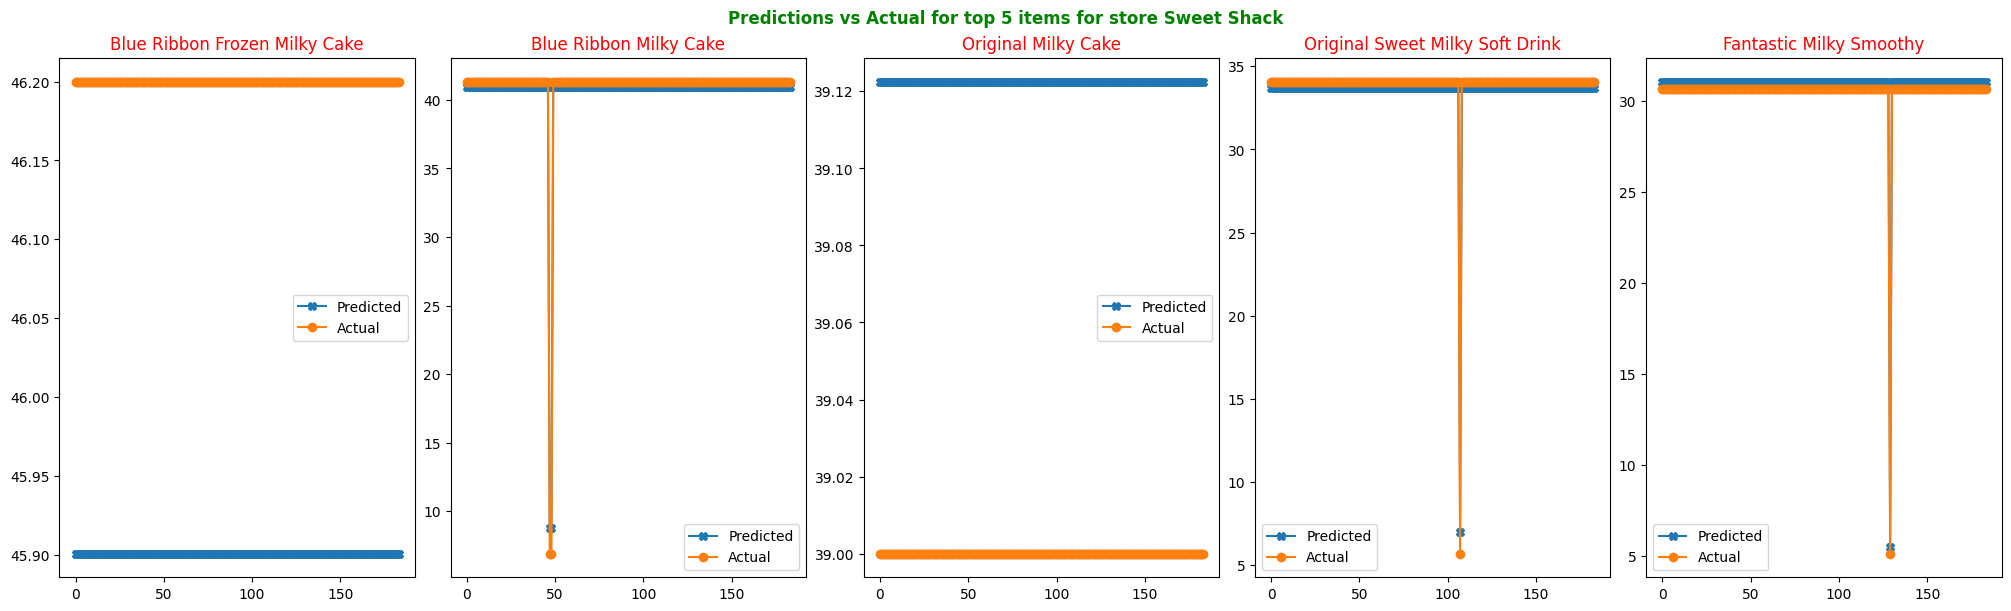

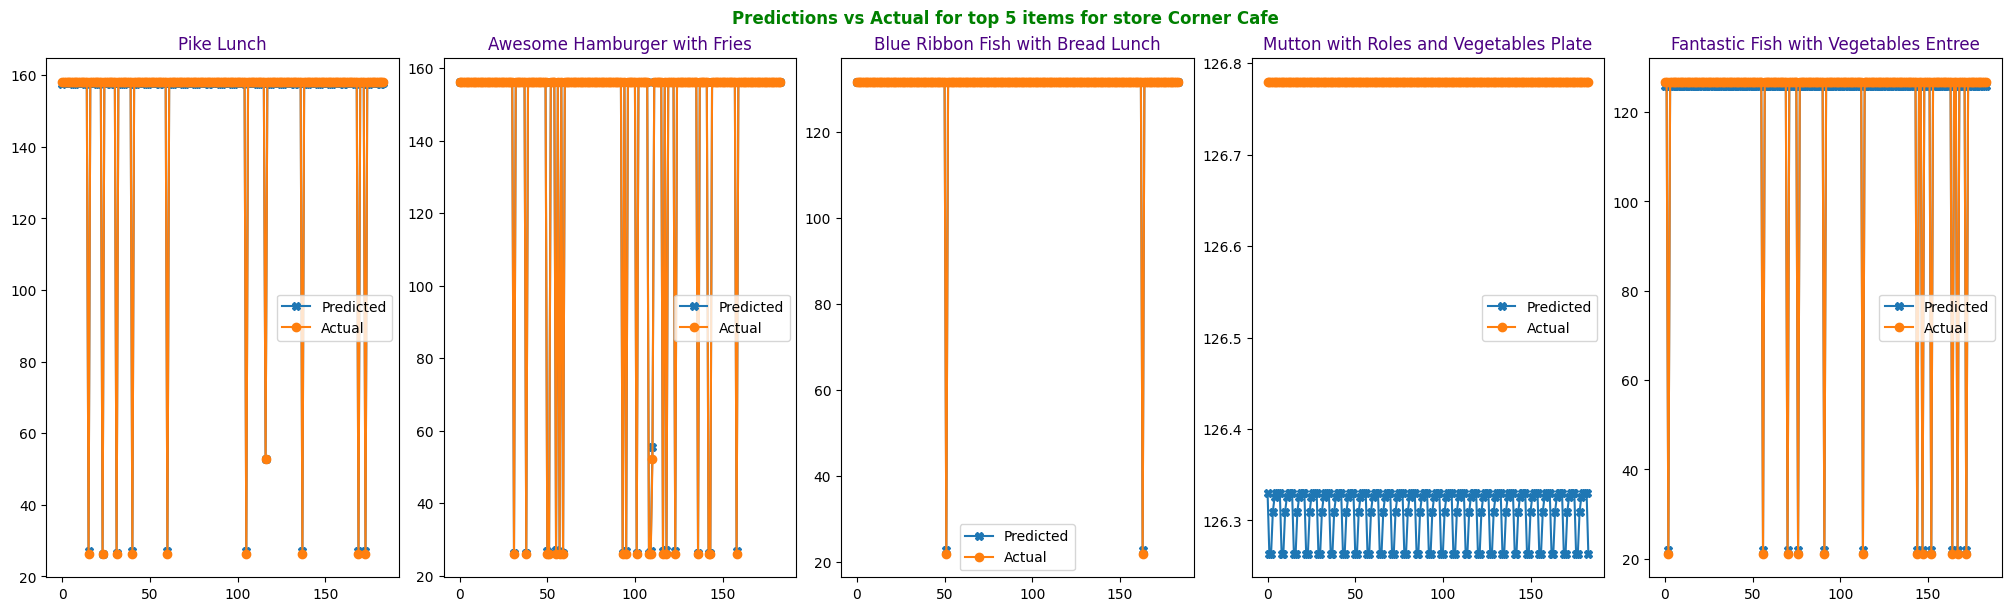

In [ ]:

colors = ['blue', 'purple','magenta','darkcyan','red','indigo']
for i,(store_id,item_id) in enumerate(top_5_items.items()):
    fig,axes = plt.subplots(1,5,figsize=(20,6), layout='constrained')
    data = X_test_data[X_test_data['store_id'] == store_id]
    for j,id in enumerate(item_id):
      item_data = data[data['item_id'] == id ].reset_index()
      actual = item_data['Sale Amount Actual']
      predicted =  item_data['Sale Amount Predicted']
      axes[j].plot(predicted, label='Predicted', marker='X')
      axes[j].plot(actual, label='Actual', marker='o')
      axes[j].set_title(f'{id_name_dict[id]}', color = colors[i])
      axes[j].legend(loc='best')
    plt.suptitle(f'Predictions vs Actual for top 5 items for store {rest_id_name_dict[store_id]}', color = 'green',fontweight = 'bold')
plt.show()


